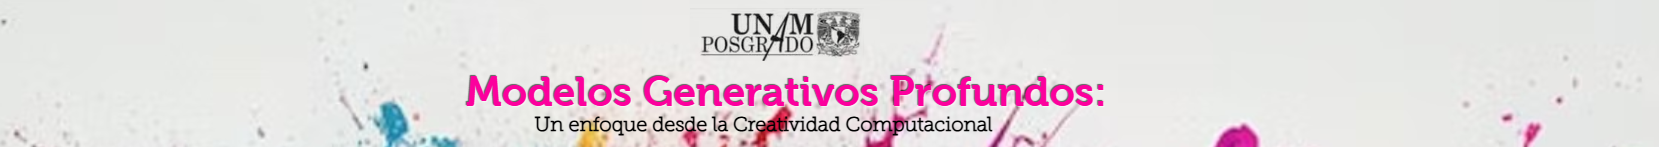

# Exploración del Decodificador de DALL·E 2 (Kandinsky 2.2)

Este notebook permite **probar el comportamiento del *decoder*** de un modelo tipo DALL·E 2,
utilizando la implementación abierta **Kandinsky 2.1** de Hugging Face.  

El *decoder* es el componente que **convierte embeddings visuales en imágenes finales**,
guiado por el texto del prompt.  

Flujo:
Texto → Prior → Decoder → Imagen.



## 1. Instalar dependencias

In [1]:
!pip install diffusers transformers accelerate torch -q
!pip install xformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 MB 9.6 MB/s eta 0:00:00


## 2. Importar librerías

In [2]:
import torch
from diffusers import KandinskyPipeline, KandinskyPriorPipeline
from PIL import Image
import matplotlib.pyplot as plt

## 3. Cargar los modelos (Prior + Decoder)

In [3]:
from diffusers import KandinskyPriorPipeline, KandinskyPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Dispositivo:", device)

# 1. Cargar el prior (texto → embeddings visuales)
prior = KandinskyPriorPipeline.from_pretrained(
    "kandinsky-community/kandinsky-2-1-prior",
    torch_dtype=torch.float16
).to(device)

# 2. Cargar el decodificador
decoder = KandinskyPipeline.from_pretrained(
    "kandinsky-community/kandinsky-2-1",
    torch_dtype=torch.float16
).to(device)

# 3. Definir prompt
prompt = "a watercolor painting of a cat wearing a space helmet"

# 4. Generar embeddings a partir del texto
prior_output = prior(prompt)
image_embeds = prior_output.image_embeds
negative_image_embeds = prior_output.negative_image_embeds

# 5. Generar imagen desde los embeddings
result = decoder(
    image_embeds=image_embeds,
    negative_image_embeds=negative_image_embeds,
    prompt=prompt,
    num_inference_steps=25
)

# 6. Mostrar resultado
image = result.images[0]
image.show()




Dispositivo: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/500 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

prior/diffusion_pytorch_model.safetensor(…):   0%|          | 0.00/4.09G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

image_encoder/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/495M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/767 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model_index.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/318 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer/sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

movq/diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type xlm-roberta to instantiate a model of type M-CLIP. This is not supported for all configurations of models and can yield errors.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

## 4. Generar embeddings visuales desde el texto

In [5]:
prompt = "a watercolor painting of a cat wearing a space helmet"

# 1. Generar ambos embeddings con el prior
prior_output = prior(prompt)
image_embeds = prior_output.image_embeds
negative_image_embeds = prior_output.negative_image_embeds  # <- necesario

# 2. Decodificar con el pipeline
image = decoder(
    image_embeds=image_embeds,
    negative_image_embeds=negative_image_embeds,  # <- agregado
    prompt=prompt,
    num_inference_steps=50
).images[0]

image.show()


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

## 5. Generar imagen con el decodificador

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

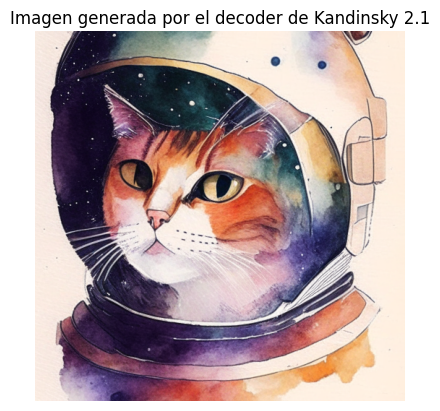

In [8]:
# 1. Obtener ambos embeddings con el prior
prior_output = prior(prompt)
image_embeds = prior_output.image_embeds
negative_image_embeds = prior_output.negative_image_embeds  # ← obligatorio

# 2. Usar el decodificador para generar la imagen final
result = decoder(
    image_embeds=image_embeds,
    negative_image_embeds=negative_image_embeds,  # ← agregado
    prompt=prompt,
    num_inference_steps=50
)

# 3. Mostrar la imagen resultante
image = result.images[0]
plt.imshow(image)
plt.axis("off")
plt.title("Imagen generada por el decoder de Kandinsky 2.1")
plt.show()



## 6. Prueba adicional: generar varias imágenes con diferentes prompts

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

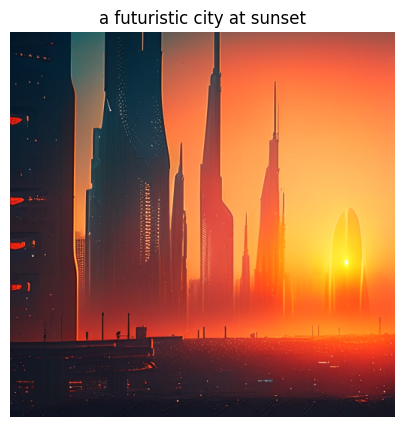

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

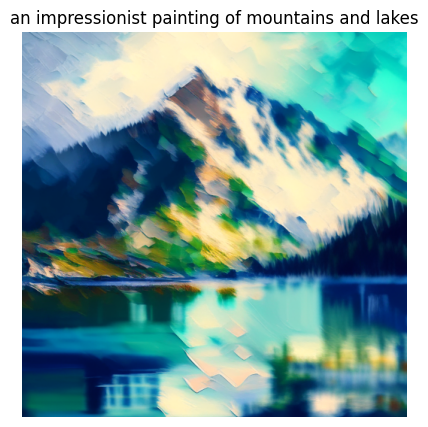

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

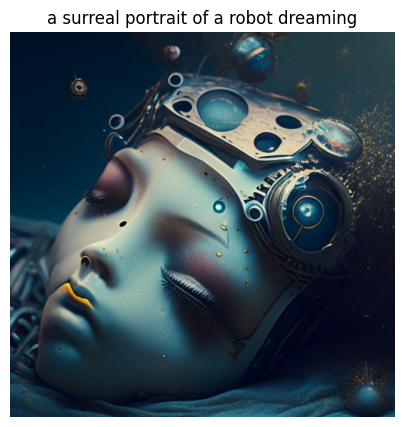

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

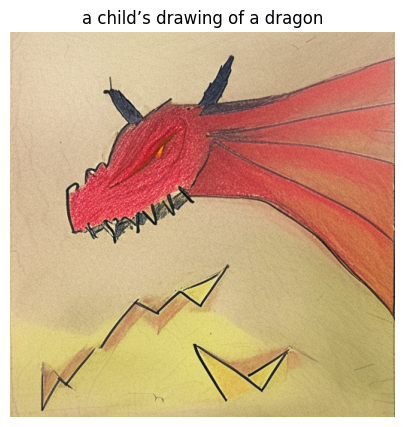

In [9]:
# Prueba con nuevos prompts
prompts = [
    "a futuristic city at sunset",
    "an impressionist painting of mountains and lakes",
    "a surreal portrait of a robot dreaming",
    "a child’s drawing of a dragon"
]

for p in prompts:
    # 1. Generar ambos embeddings con el prior
    prior_output = prior(p)
    image_embeds = prior_output.image_embeds
    negative_image_embeds = prior_output.negative_image_embeds  # <- necesario

    # 2. Usar el decodificador para generar la imagen
    result = decoder(
        image_embeds=image_embeds,
        negative_image_embeds=negative_image_embeds,  # <- agregado
        prompt=p,
        num_inference_steps=50
    )

    # 3. Mostrar el resultado
    img = result.images[0]
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(p, fontsize=12)
    plt.show()
